# Sales Analysis

In [109]:
# Import neccessary libraries
import pandas as pd
import pandas_profiling

Task #1: Merge 12 months of sales into a single CSV file:
 - Read all file using: os.listdir and pd.read_csv
 - Initialize empty DataFrame
 - Concate all df into one

In [110]:
files = [file for file in os.listdir('./Sales_Data/')]

all_months_data = pd.DataFrame()

for file in files:
    df = pd.read_csv("./Sales_Data/" + file)
    all_months_data = pd.concat([all_months_data, df])

# Take all 12 excels and concatenate them into single csv
all_months_data.to_csv("all_data.csv", index=False)

Read in updated dataframe

In [113]:
all_data = pd.read_csv("all_data.csv")
all_data.head()
sales_analysis_report = all_data.profile_report(title="Auto-generated Report")
sales_analysis_report.to_file(output_file="Sales Analysis Profiling Report.html")

Summarize dataset:  76%|███████▌  | 16/21 [00:05<00:01,  4.40it/s, Missing diagram dendrogram]       C:\Users\freya\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\scipy\cluster\hierarchy.py:2846: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  ax.set_ylim([dvw, 0])
Export report to file: 100%|██████████| 1/1 [00:00<00:00, 1025.50it/s]


Check NaN values

In [100]:
nan_data = all_data[all_data.isna().any(axis=1)]
all_data.drop(nan_data.index, inplace=True)
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


Check Duplicates

In [101]:
duplicated_data = all_data[all_data.duplicated()]
duplicated_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
31,176585,Bose SoundSport Headphones,1,99.99,04/07/19 11:31,"823 Highland St, Boston, MA 02215"
1149,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1155,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1302,177795,Apple Airpods Headphones,1,150,04/27/19 19:45,"740 14th St, Seattle, WA 98101"
1684,178158,USB-C Charging Cable,1,11.95,04/28/19 21:13,"197 Center St, San Francisco, CA 94016"


Augment data with additional columns

Task #2: Clean the Data
- Drop NaN values from DataFrame
- When converting 'month' column to int32, we encounter ValueError: invalid literal for int() with base 10: 'Or' > remove all rows with 'Or'
- Convert ['Quantity Ordered'] and ['Price Each'] into int, float: 
    - astype("int32") | astype("float") | 
    - pd.to_numeric(df['column_name'])

In [102]:
all_data = all_data.dropna(how="all").drop_duplicates()
all_data.head(5)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


Task #3: Add Month Column
- Convert "Order Date" column into string using str()

In [94]:
all_data["Month"] = all_data["Order Date"].str[0:2]
all_data = all_data[all_data["Month"] != "Or"]
all_data["Month"] = all_data["Month"].astype('int32')
all_data = all_data.sort_values(by=['Order Date'])
all_data.to_csv('all_data.csv', index="False")

Question #1: What was the best month for sales? How much was earned that month?
- Concat all monthly excel files into one.
- Clean data: dropna
- Add new column named month to distinguish

In [12]:
all_data["Quantity Ordered"] = all_data["Quantity Ordered"].astype("int32")
all_data["Price Each"] = pd.to_numeric(all_data["Price Each"])
all_data["Total Sales"] = all_data["Quantity Ordered"]*all_data["Price Each"]
results_desc = all_data.groupby("Month").sum().sort_values(by=["Total Sales"])
results = all_data.groupby("Month").sum()

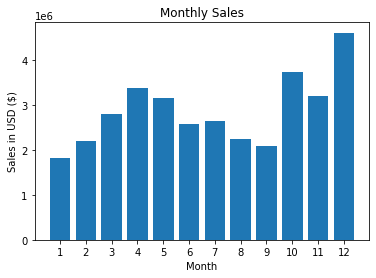

In [13]:
import matplotlib.pyplot as plt

months = range(1, 13)
plt.bar(months, results["Total Sales"])
plt.title("Monthly Sales")
plt.xticks(months)
plt.xlabel("Month")
plt.ylabel("Sales in USD ($)")
plt.show()

Question #2: Which city has the highest total sales?
- Note: each column is a pandas Series, therefore, you have to turn it into data values that you want
- 2 ways to split:
    - apply and lambda
    - str

In [16]:
# Method 1:
# all_data["City"] = all_data["Purchase Address"].str.split(",").str[1]

# Method 2:
# all_data["City"] = all_data["Purchase Address"].apply(lambda x: x.split(",")[1])

# Method 3: Use function inside the lambda
def get_city(address):
    return address.split(",")[1]

def get_state(address):
    return address.split(",")[2].split(" ")[1]

all_data["City"] = all_data["Purchase Address"].apply(lambda x: get_city(x) + "  (" + get_state(x) + ")")


all_data.head(5)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Total Sales,City
73891,147268,Wired Headphones,1,11.99,01/01/19 03:07,"9 Lake St, New York City, NY 10001",1,11.99,New York City (NY)
74701,148041,USB-C Charging Cable,1,11.95,01/01/19 03:40,"760 Church St, San Francisco, CA 94016",1,11.95,San Francisco (CA)
76054,149343,Apple Airpods Headphones,1,150.00,01/01/19 04:56,"735 5th St, New York City, NY 10001",1,150.00,New York City (NY)
76708,149964,AAA Batteries (4-pack),1,2.99,01/01/19 05:53,"75 Jackson St, Dallas, TX 75001",1,2.99,Dallas (TX)
76061,149350,USB-C Charging Cable,2,11.95,01/01/19 06:03,"943 2nd St, Atlanta, GA 30301",1,23.90,Atlanta (GA)


In [17]:
all_data.groupby("City").sum().sort_values(by=["Total Sales"])
results_by_city = all_data.groupby("City").sum()["Total Sales"]
results_by_city

City
 Atlanta  (GA)          2795498.58
 Austin  (TX)           1819581.75
 Boston  (MA)           3661642.01
 Dallas  (TX)           2767975.40
 Los Angeles  (CA)      5452570.80
 New York City  (NY)    4664317.43
 Portland  (ME)          449758.27
 Portland  (OR)         1870732.34
 San Francisco  (CA)    8262203.91
 Seattle  (WA)          2747755.48
Name: Total Sales, dtype: float64

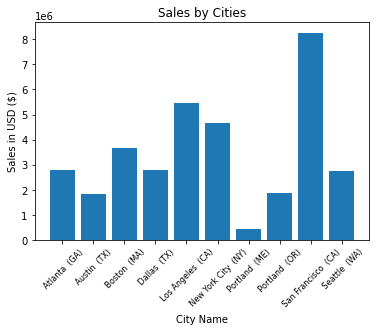

In [22]:
cities = [city for city, df in all_data.groupby("City")]
plt.bar(cities, results_by_city)
plt.xticks(cities, rotation="45", size=8)
plt.xlabel("City Name")
plt.ylabel("Sales in USD ($)")
plt.title("Sales by Cities")
plt.show()

Question #3: What time should we display advertisements to maximize likelihood of customer's buying product?